<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/conditional_plots_multivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/adult22_filtered.csv")

# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columnbs from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 14 columns in the data.
---------------------------------------------------------------------------------------------------

  Age Sex Cancer Coronary_heart_disease Depression Smoked_100_cig Education
1  64   1      1                      1          2              1         8
2  37   2      2                      2          2              2         8
3  72   2      2                      2          2              2         5
4  84   2      2                      2          2              2         6
5  31   2      2                      2          2              1         8
6  81   2      1                      2          2              2         4
  Region Anxiety Height Weight Sleep_hours Aerobic.Strength Alcohol_drink_12m
1      3       4     74    235           8                3               108
2      3       3     69    218           9                3                 0
3      3       5     64    240           8                1                12
4     

In [2]:
# Loading in and or installing packages
library(dplyr)
library(ggplot2)
library(zip)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [3]:
# Creating a vector for the numeric column names
num_cols <- c("Age", "Height", "Weight", "Sleep_hours", "Alcohol_drink_12m")

# Creating a vector for the categorical column names
cat_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
              'Education', 'Region', 'Anxiety','Aerobic.Strength')
# Creating a copy of df
df_copy <- df

# Converting below columns in the df_copy dataframe to factors with original labels.
df_copy$Sex <- factor(df_copy$Sex, labels=c('Male', 'Female'))
df_copy$Cancer <- factor(df_copy$Cancer, labels=c('Yes','No'))
df_copy$Coronary_heart_disease <- factor(df_copy$Coronary_heart_disease, labels = c('Yes', 'No'))
df_copy$Depression <- factor(df_copy$Depression, labels = c('Yes','No'))
df_copy$Smoked_100_cig <- factor(df_copy$Smoked_100_cig, labels = c('Yes', 'No'))
df_copy$Education <- factor(df_copy$Education, labels = c('1-11', '12th', 'GED', 'High School', 'Some College', 'Assoc Tech', 'Assoc Acad', 'Bach', 'Mast', 'Prof'))
df_copy$Region <- factor(df_copy$Region, labels = c('Northeast', 'Midwest', 'South', 'West'))
df_copy$Anxiety <- factor(df_copy$Anxiety, labels = c('Daily', 'Weekly', 'Monthly', 'Few times Y', 'Never'))
df_copy$`Aerobic.Strength` <- factor(df_copy$`Aerobic.Strength`, labels = c('Neither', 'Strength', 'Aerobic', 'Both'))


# Creating colors vector to hold custom hex values for plots
colors <- c("#D62728", "#1F77B4", "#FF7F0E", "#2CA02C",
            "#9467BD", "#8C564B", "#E377C2", "#17BECF",
            "#BCBD22", "#AEC7E8")

# *Conditional Plots*

A conditional plot can be thought of as a scatterplot showing the relationship between two numeric variables while also accounting for a categorical variable. Instead of using different colors or symbols to represent each category on the same plot, separate plots are used. For example, if the categorical variable has two groups, there will be two plots—one for each group.

In [4]:
# Creating variable to hold different numerical variable combinations
num_cols_combination <- combn(num_cols, 2, simplify = FALSE)

# Folder to save images
output_folder <- "conditional_plots"
dir.create(output_folder, showWarnings = FALSE)


# Iterating through each value option in num_cols_combination
for (i in num_cols_combination) {
  # Extracting the first part of i as the x variable and the second part of i as the y variable
  x <- i[1]
  y <- i[2]

  # Iterating through each categorical value in the cat_cols vector
  for (cat_var in cat_cols){

    # Create conditional plot
    p <- ggplot(df_copy, aes(x = .data[[x]], y = .data[[y]])) +
          geom_point(aes(color = .data[[cat_var]])) +
          facet_wrap(~ .data[[cat_var]]) +
          # Specifiy colors
          scale_fill_manual(values=colors) +
          scale_color_manual(values=colors) +
          # Add custom title
          ggtitle(paste(x,'vs',y,'grouped by',cat_var)) +
          # Adjust font size and color
          theme(legend.text= element_text(size=21),
                legend.title = element_text(size=24),
                strip.text = element_text(size = 16),
                axis.text.x = element_text(size=12, color='black'),
                axis.text.y = element_text(size=12, color='black'),
                plot.title = element_text(hjust=0.5, size=26),
                axis.title.x = element_text(size=14),
                axis.title.y = element_text(size=14))

                # Saving ploting to output folder
                filename <- paste0(output_folder, "/",x,'_vs_',y,'_groupedby_', cat_var, ".png")
                ggsave(filename, plot = p, width = 13, height = 8)

  }}

# Zip all PNG from output folder
zip::zip(zipfile = "conditional_plot.zip", files = list.files(output_folder, full.names = TRUE))

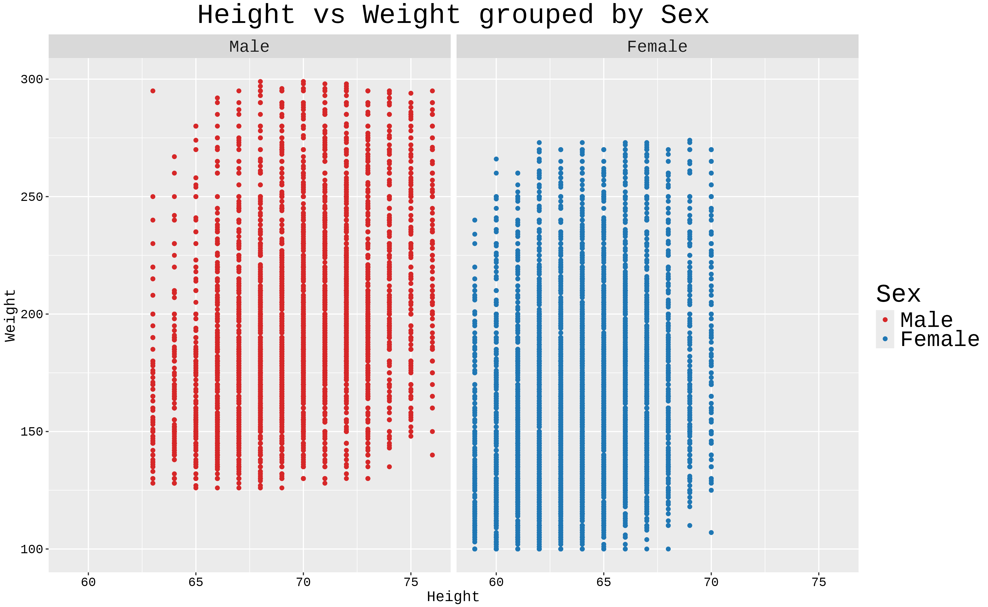

The plots above represent the distribution between height and weight, grouped by sex. Males appear to range from about 62 to 76 inches tall, while females range from approximately 58 to 72 inches tall. For weight, males generally fall between 125 and 300 pounds, with females ranging from 100 to 275 pounds. Looking at the scatter plot pattern, there is a positive correlation between height and weight for both sexes - as height increases, weight tends to increase as well.